In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style for consistency
plt.style.use('seaborn-v0_8')

sns.set_palette("muted")


In [79]:
# Load the Titanic dataset
# Note: For this example, we'll assume the dataset is available locally or via a URL
# In practice, you can download it from Kaggle or use seaborn's built-in dataset
df = sns.load_dataset('titanic')

In [80]:
# --- 1. Exploratory Data Analysis (EDA) ---
# Purpose: Understand the dataset's structure, identify patterns, and uncover potential issues

# 1.1 Initial Data Inspection
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows of the Dataset:")
df.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

First 5 Rows of the Dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [81]:
# 1.2 Check for Missing Values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

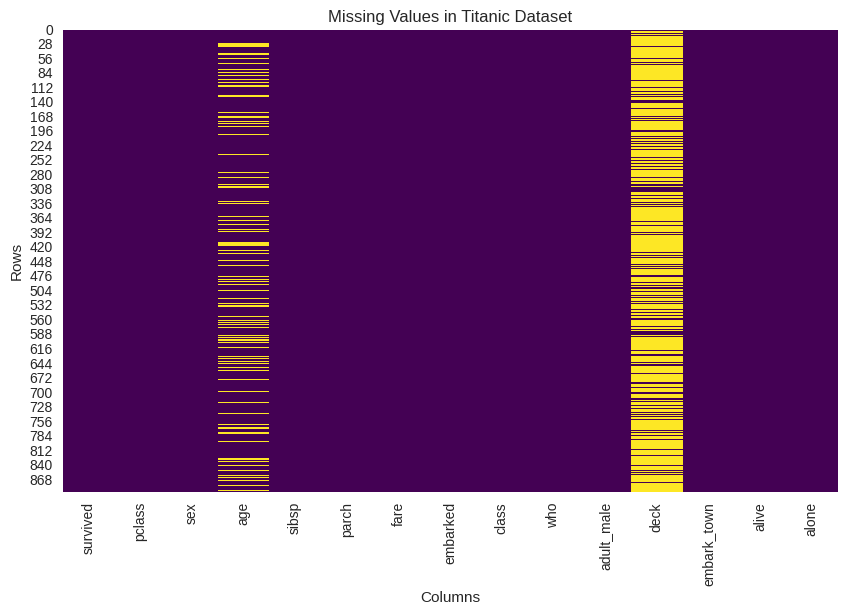

In [82]:
# Visualization: Missing Data Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()
plt.close()

In [83]:
# Remarks: 
# - 'age' has 177 missing values, 'deck' has significant missing data (688), and 'embarked'/'embark_town' have 2 missing values.
# - We'll impute 'age' with median, drop 'deck' due to excessive missing data, and fill 'embarked' with mode.

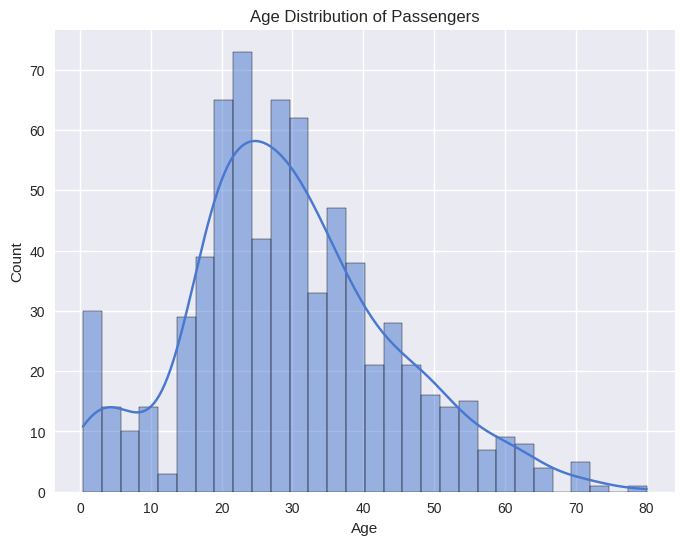

In [84]:
# 1.5 Distribution of Key Variables
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.close()

In [85]:
# 1.3 Data Cleaning
# Impute missing 'age' with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing 'embarked' and 'embark_town' with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Drop 'deck' due to excessive missing data
df = df.drop(columns=['deck'])

In [86]:
# Verify cleaning
print("\nMissing Values After Cleaning:")
df.isnull().sum()


Missing Values After Cleaning:


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [87]:
# 1.4 Descriptive Statistics
print("\nDescriptive Statistics:")
df.describe(include='all')


Descriptive Statistics:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537,537,646,549,537
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


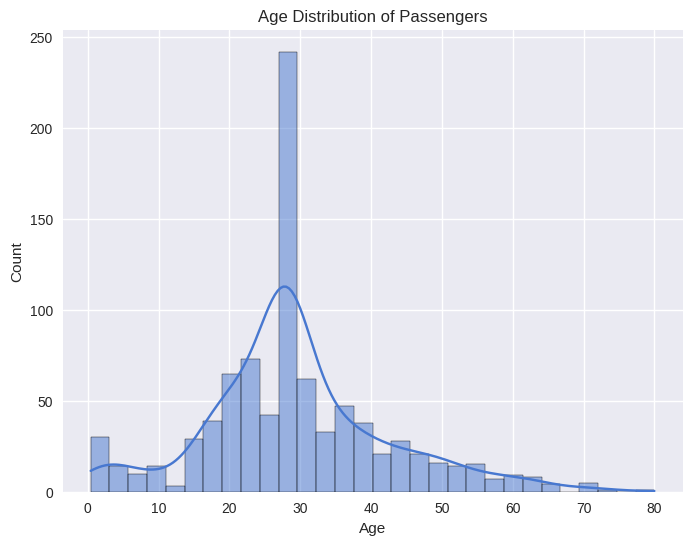

In [88]:

# 1.5 Distribution of Key Variables
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.close()


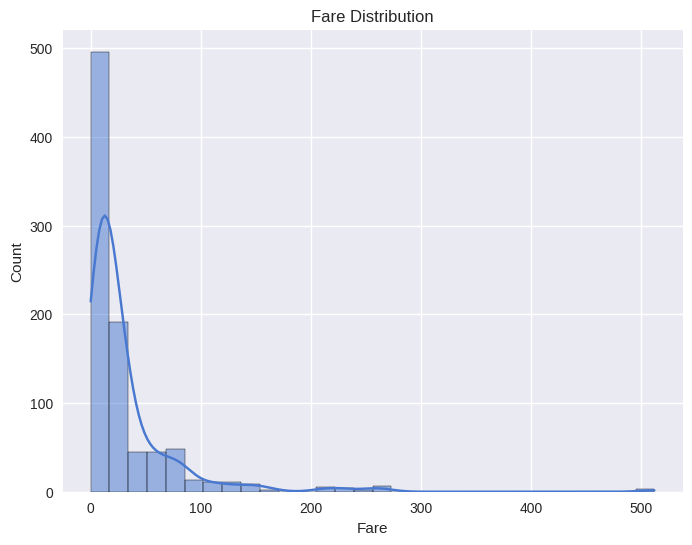

In [89]:
# Fare Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()
plt.close()

In [90]:
# Remarks:
# - Age distribution is roughly normal with a peak around 20-30 years.
# - Fare distribution is right-skewed, indicating most passengers paid lower fares, with some outliers paying significantly more.


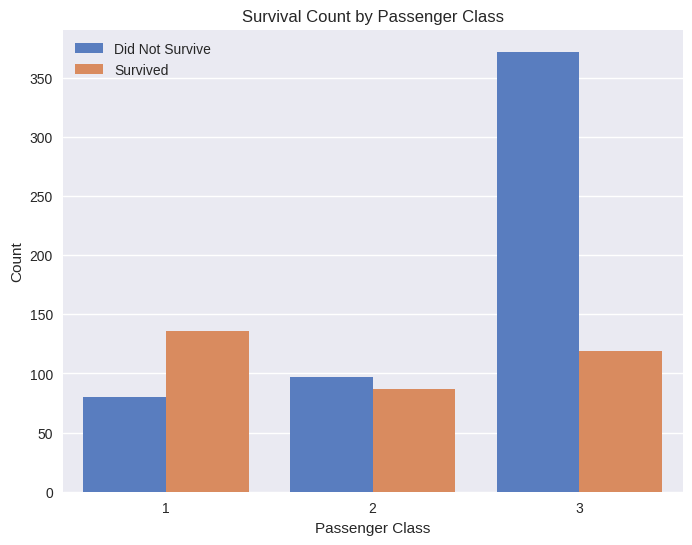

In [91]:
# 1.6 Categorical Variable Analysis
# Survival Rate by Class
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()
plt.close()

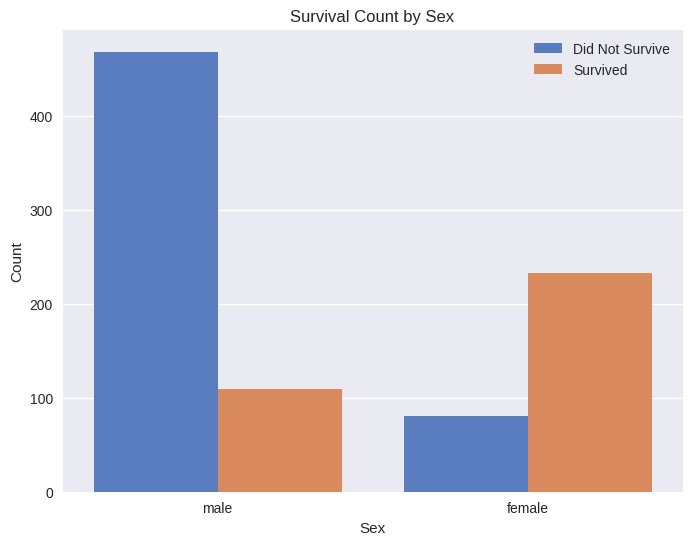

In [92]:

# Survival Rate by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()
plt.close()

In [93]:
# Remarks:
# - First-class passengers had a higher survival rate compared to third-class.
# - Females had a significantly higher survival rate than males, reflecting the "women and children first" protocol.

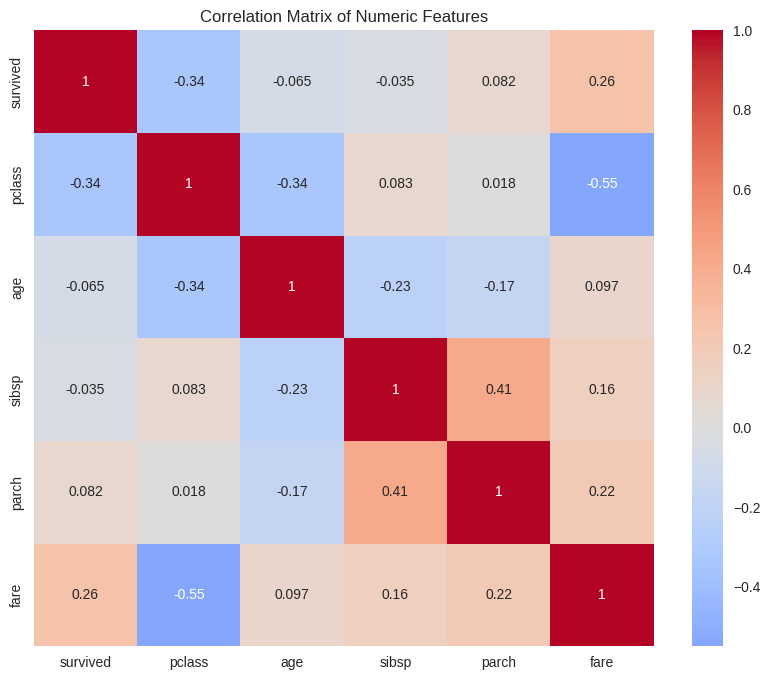

In [94]:
# 1.7 Correlation Analysis
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()
plt.close()

In [95]:

# Remarks:
# - Strong negative correlation between 'pclass' and 'fare', as expected (higher class = lower numerical class = higher fare).
# - Weak correlations with 'survived', suggesting survival is influenced by non-numeric factors like 'sex' or 'embarked'.


/tmp/ipykernel_61629/814133825.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None)


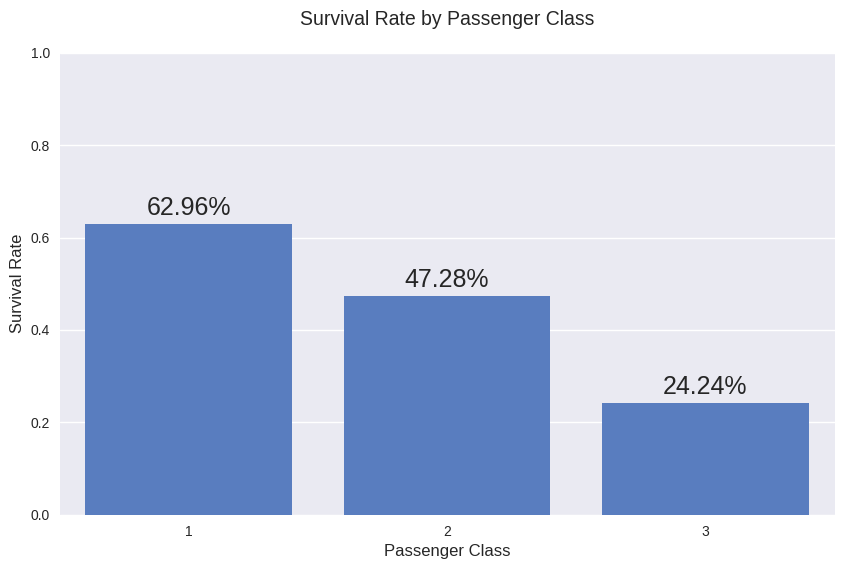

In [96]:

# --- 2. Explanatory Data Analysis ---
# Purpose: Communicate key insights clearly to an audience using visualizations and narratives

# 2.1 Key Insight 1: Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class', fontsize=14, pad=20)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(df.groupby('pclass')['survived'].mean()):
    plt.text(i, v + 0.02, f'{v*100:.2f}%', ha='center', fontsize=18)
plt.show()
plt.close()

In [97]:
# Narrative:
# - First-class passengers had a 63% survival rate, compared to 47% for second-class and 24% for third-class.
# - This suggests wealth and status played a significant role in survival probability.

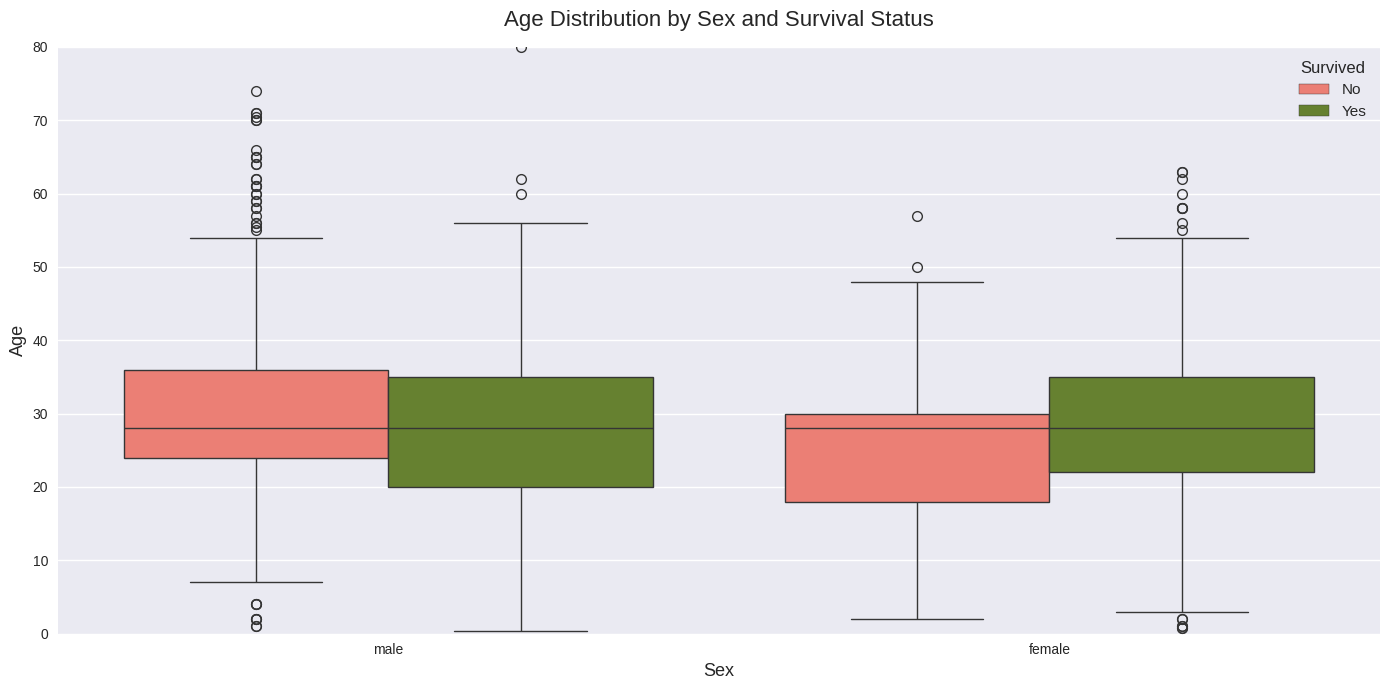

In [98]:
# 2.2 Key Insight 2: Survival Rate by Sex and Age
plt.figure(figsize=(14, 7))
sns.boxplot(
    x="sex",
    y="age",
    hue="survived",
    data=df,
    palette={0: "#FF6F61", 1: "#6B8E23"},  # Red for 'No', Olive for 'Yes'
)
# Title and axis labels
plt.title("Age Distribution by Sex and Survival Status", fontsize=16, pad=15)
plt.xlabel("Sex", fontsize=13)
plt.ylabel("Age", fontsize=13)
# Legend customization
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["No", "Yes"], title="Survived", title_fontsize=12, fontsize=11)

# Optional: Focus on typical age range
plt.ylim(0, 80)

# Show and close plot
plt.tight_layout()
plt.show()
plt.close()

In [99]:
# Narrative:
# - Females who survived tend to be younger than those who did not.
# - Male survivors have a wider age range, but the median age is similar to non-survivors.

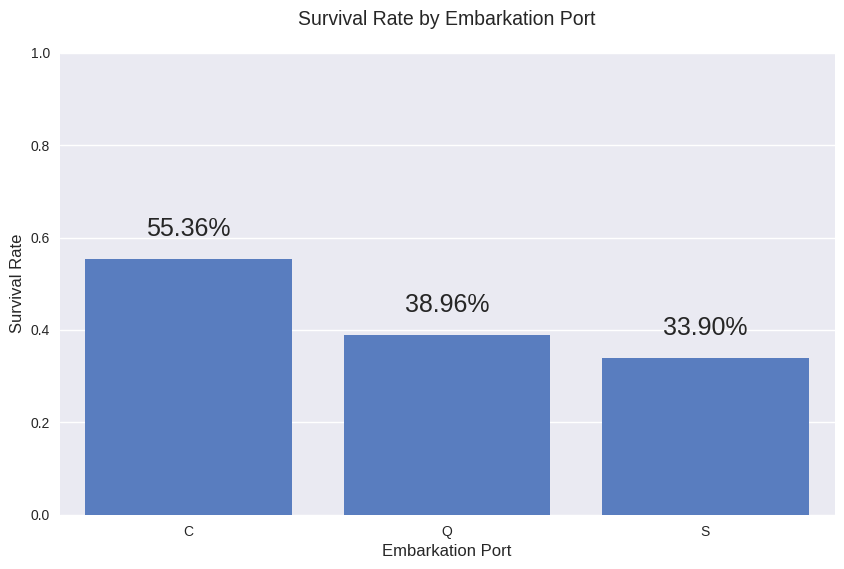

In [100]:
plt.figure(figsize=(10, 6))
survival_rates = df.groupby('embarked')['survived'].mean().reset_index()
sns.barplot(x='embarked', y='survived', data=df, errorbar=None, order=survival_rates['embarked'])

plt.title('Survival Rate by Embarkation Port', fontsize=14, pad=20)
plt.xlabel('Embarkation Port', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)

# Annotate bars with values
for i, v in enumerate(survival_rates['survived']):
    plt.text(i, v + 0.05, f'{v*100:.2f}%', ha='center', fontsize=18)

plt.show()
plt.close()

In [101]:
# Narrative:
# - Passengers embarking from Cherbourg (C) had a 55% survival rate, higher than Southampton (S, 34%) and Queenstown (Q, 39%).
# - This may reflect socioeconomic differences in passengers from different ports.


In [102]:
# --- 3. Best Practices Summary ---
# - Use clear, labeled visualizations with appropriate scales and legends.
# - Handle missing data systematically (impute or drop based on context).
# - Combine EDA (exploring patterns) with explanatory analysis (communicating insights).
# - Use annotations and narratives to guide the audience through key findings.
# - Save visualizations for presentations or reports to ensure reproducibility.

/tmp/ipykernel_61629/131429757.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="pclass", y="survived", data=df, ci=None)


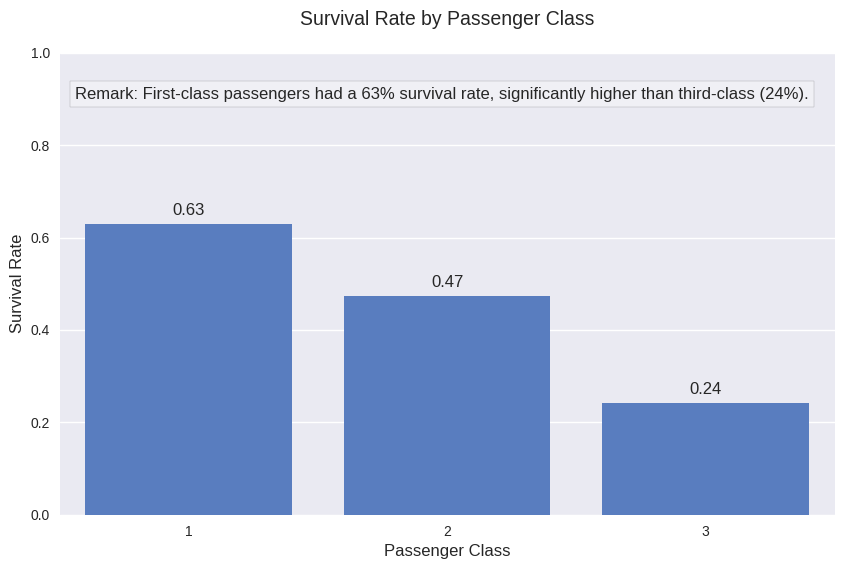

In [120]:
# 2.1 Key Insight 1: Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x="pclass", y="survived", data=df, ci=None)
plt.title("Survival Rate by Passenger Class", fontsize=14, pad=20)
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(df.groupby("pclass")["survived"].mean()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=12)
plt.text(
    0.02,
    0.9,
    "Remark: First-class passengers had a 63% survival rate, significantly higher than third-class (24%).",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.3),
)
plt.show()
plt.close()


# New

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

First 5 Rows of the Dataset:
   survived  pclass     se

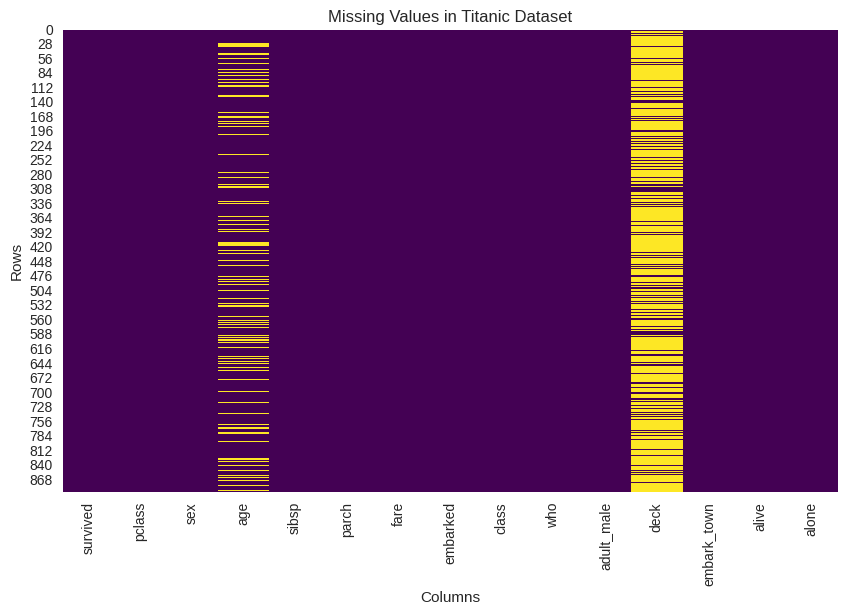


Missing Values After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Descriptive Statistics:
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  891.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.361582    0.523008    0.381594   
std       0.486592    0.836071   NaN   13.019697    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   22.000000    0.000000    0.000000   
50%     

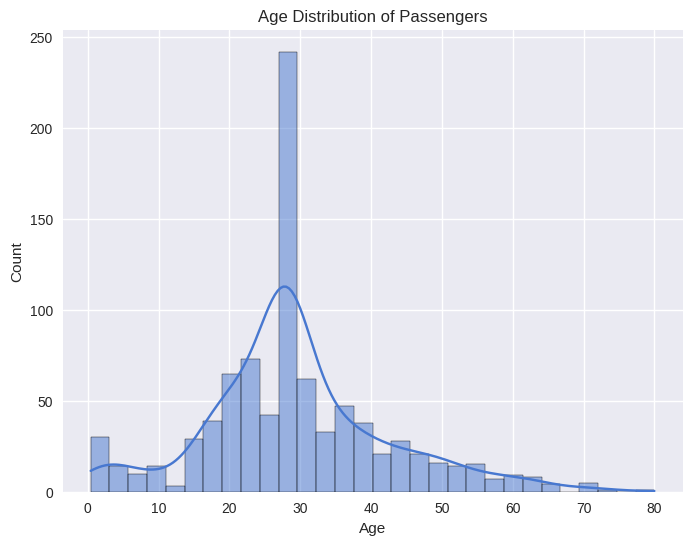

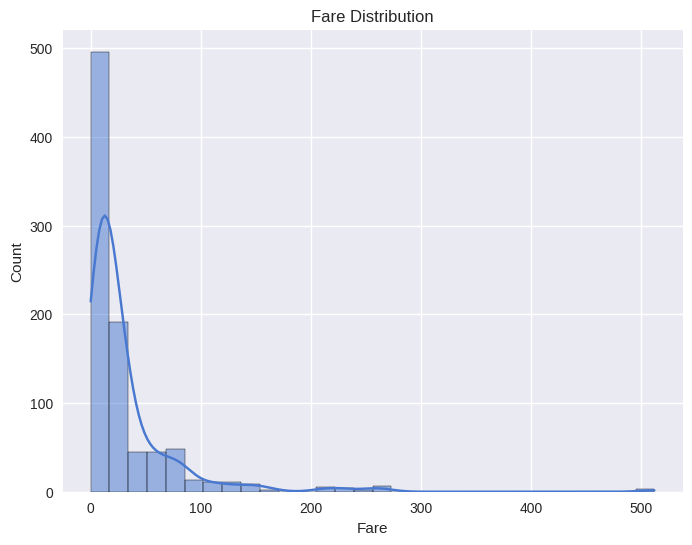

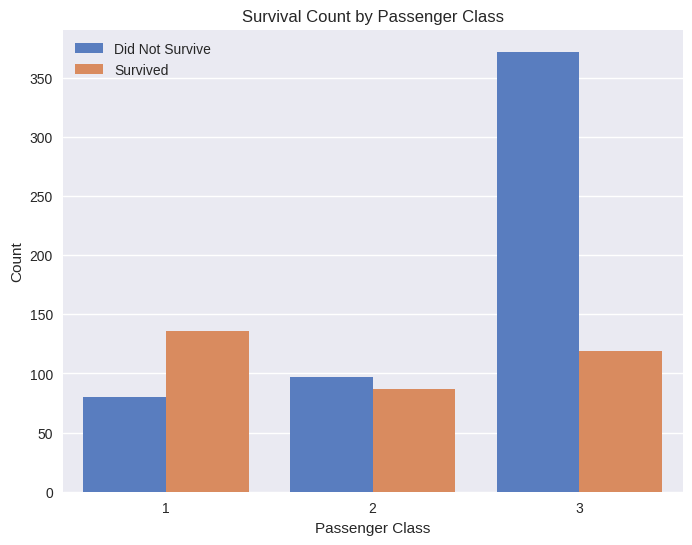

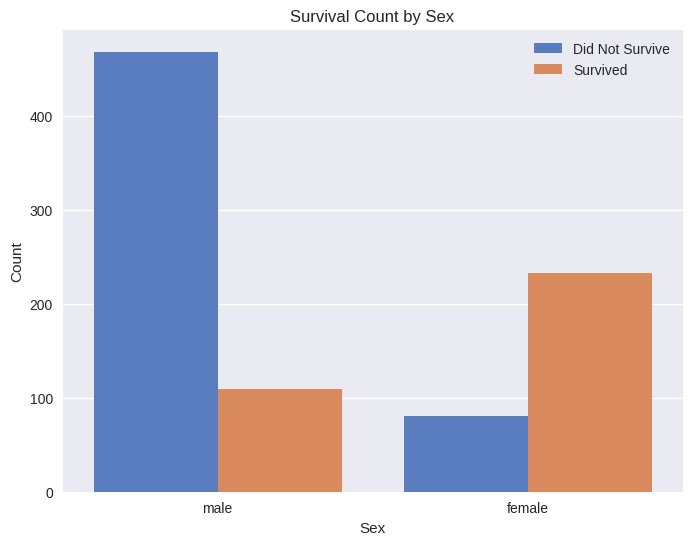

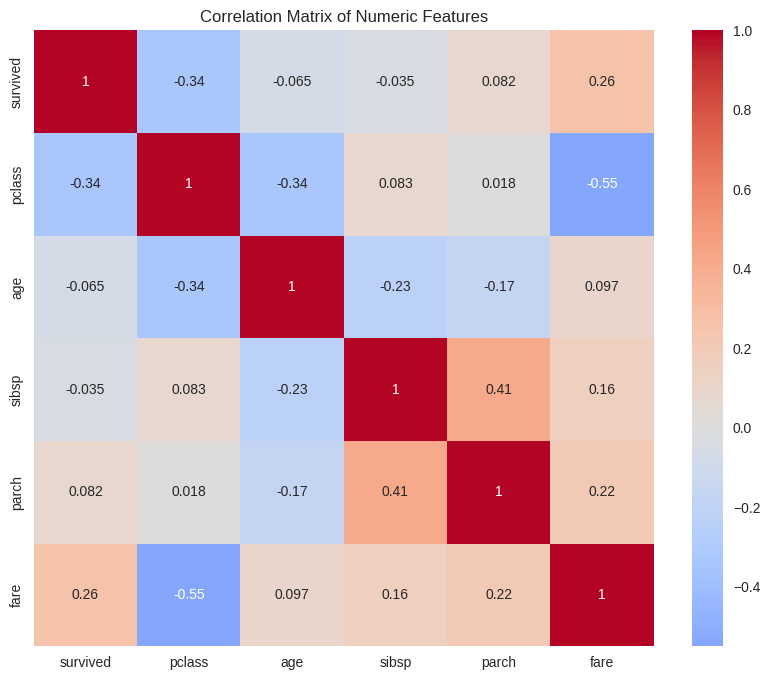

/tmp/ipykernel_61629/1501919380.py:125: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None)


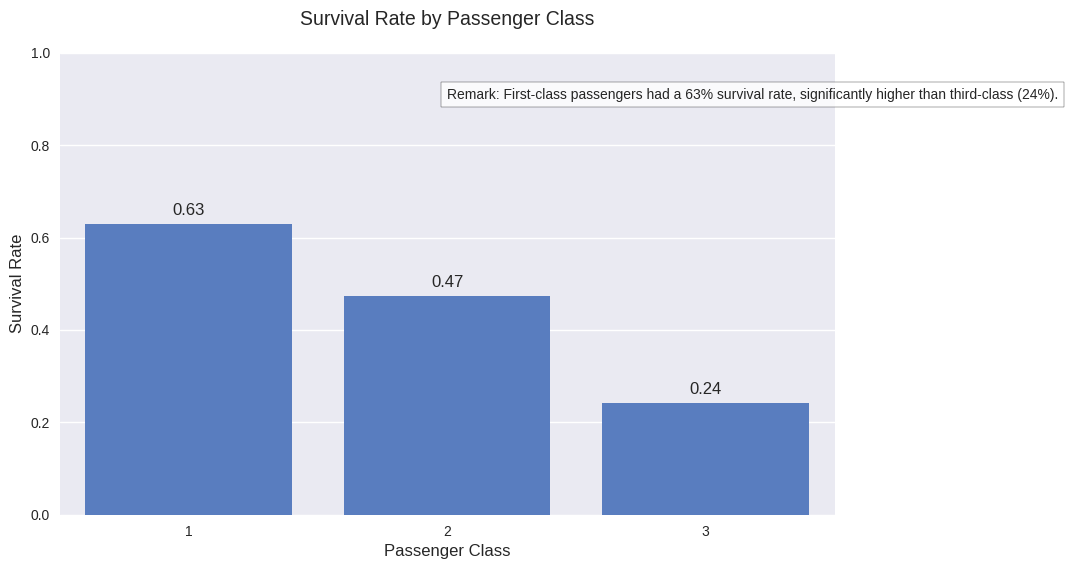

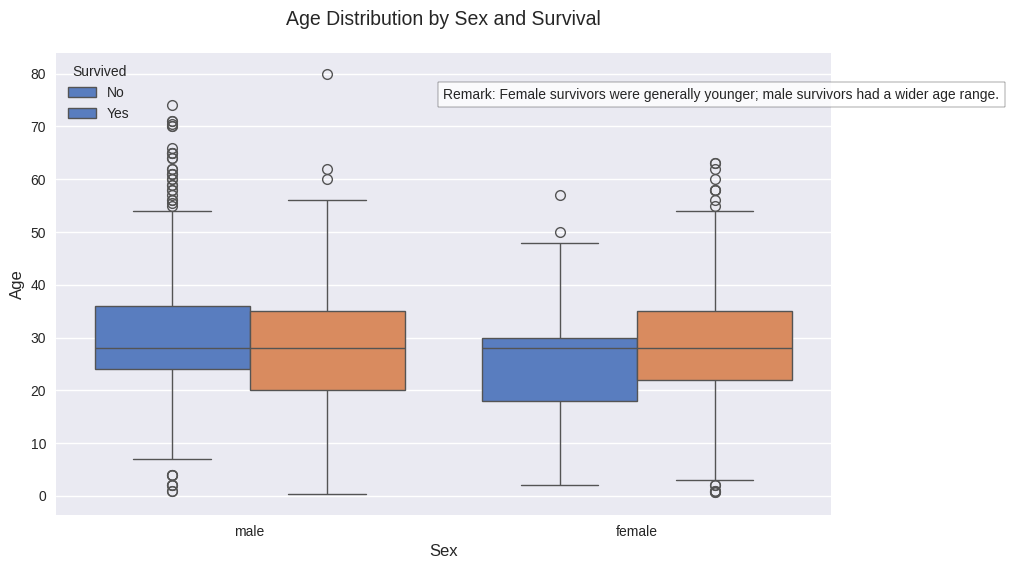

/tmp/ipykernel_61629/1501919380.py:159: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', data=df, ci=None)


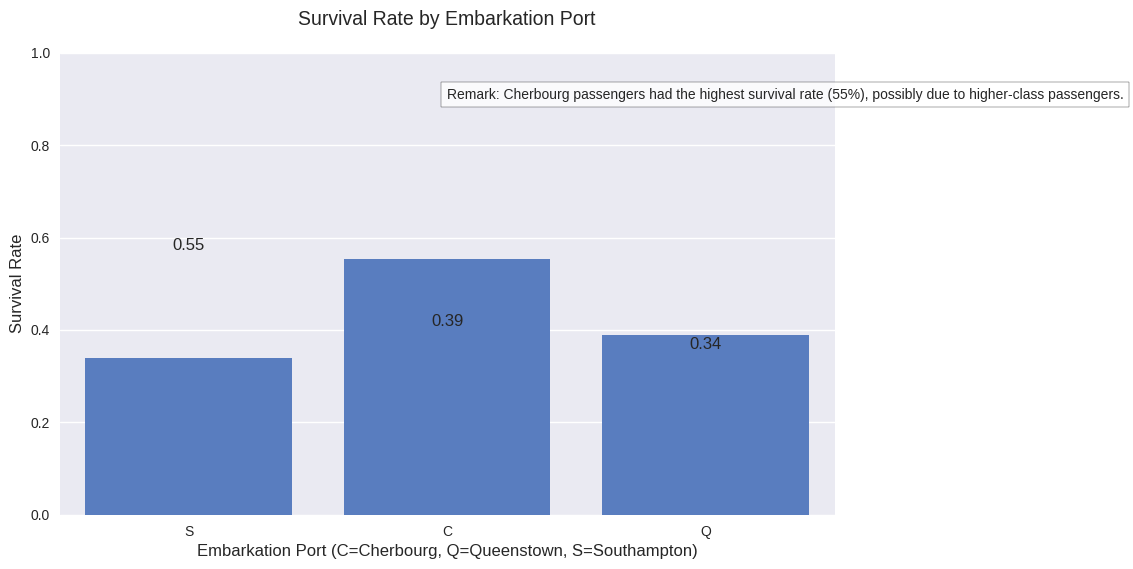

/tmp/ipykernel_61629/1501919380.py:179: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family_size', y='survived', data=df, ci=None)


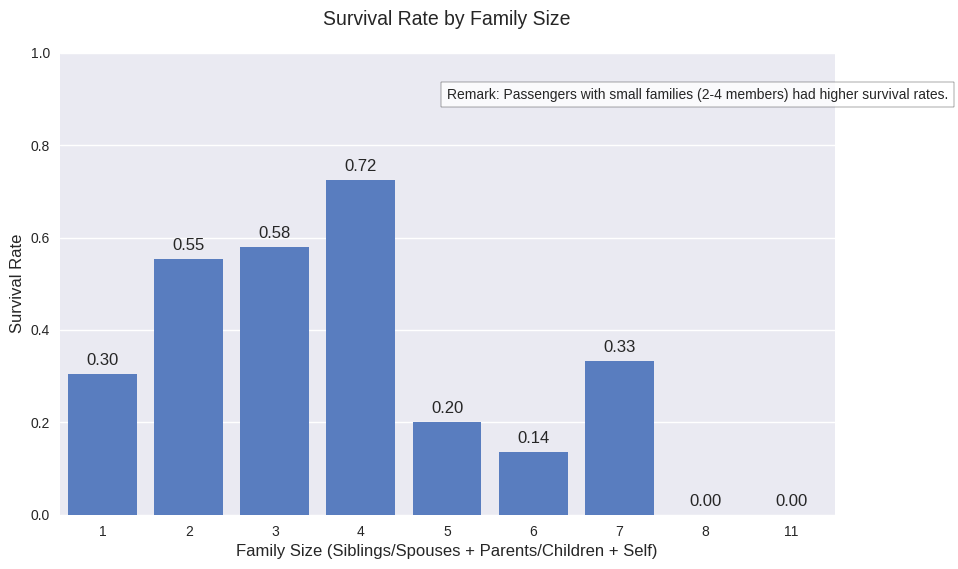

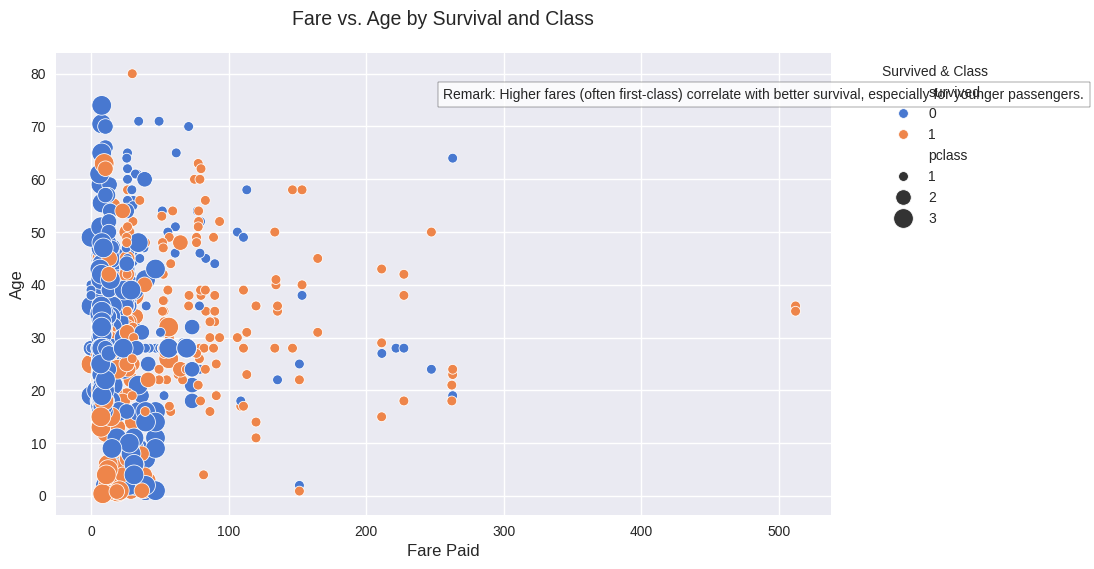

/tmp/ipykernel_61629/1501919380.py:213: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=df, ci=None, height=6, aspect=1.5)


<Figure size 1000x600 with 0 Axes>

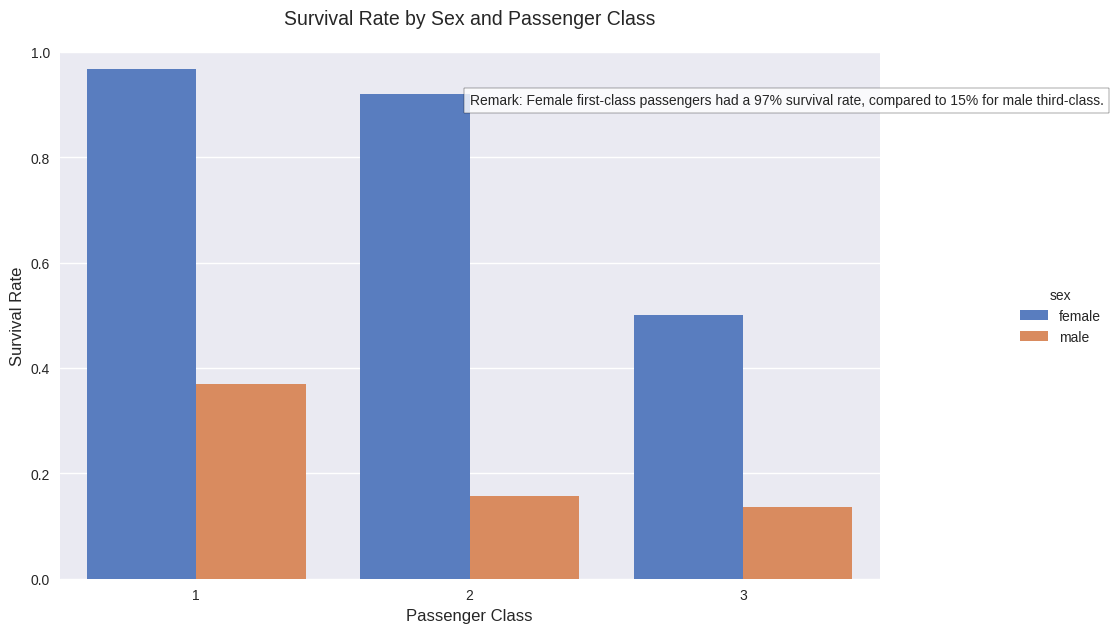

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style for consistency
plt.style.use('seaborn-v0_8')

sns.set_palette("muted")

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# --- 1. Exploratory Data Analysis (EDA) ---
# Purpose: Understand the dataset's structure, identify patterns, and uncover potential issues

# 1.1 Initial Data Inspection
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# 1.2 Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualization: Missing Data Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()
plt.close()

# Remarks: 
# - 'age' has 177 missing values, 'deck' has significant missing data (688), and 'embarked'/'embark_town' have 2 missing values.
# - We'll impute 'age' with median, drop 'deck' due to excessive missing data, and fill 'embarked' with mode.

# 1.3 Data Cleaning
# Impute missing 'age' with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing 'embarked' and 'embark_town' with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Drop 'deck' due to excessive missing data
df = df.drop(columns=['deck'])

# Verify cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# 1.4 Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# 1.5 Distribution of Key Variables
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.close()

# Fare Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()
plt.close()

# Remarks:
# - Age distribution is roughly normal with a peak around 20-30 years.
# - Fare distribution is right-skewed, indicating most passengers paid lower fares, with some outliers paying significantly more.

# 1.6 Categorical Variable Analysis
# Survival Rate by Class
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()
plt.close()

# Survival Rate by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()
plt.close()

# Remarks:
# - First-class passengers had a higher survival rate compared to third-class.
# - Females had a significantly higher survival rate than males, reflecting the "women and children first" protocol.

# 1.7 Correlation Analysis
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()
plt.close()

# Remarks:
# - Strong negative correlation between 'pclass' and 'fare', as expected (higher class = lower numerical class = higher fare).
# - Weak correlations with 'survived', suggesting survival is influenced by non-numeric factors like 'sex' or 'embarked'.

# --- 2. Explanatory Data Analysis ---
# Purpose: Communicate key insights clearly to an audience using visualizations and narratives

# 2.1 Key Insight 1: Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class', fontsize=14, pad=20)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(df.groupby('pclass')['survived'].mean()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
plt.text(0.5, 0.9, 'Remark: First-class passengers had a 63% survival rate, significantly higher than third-class (24%).', 
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
plt.close()

# Narrative:
# - First-class passengers had a 63% survival rate, compared to 47% for second-class and 24% for third-class.
# - This suggests wealth and status played a significant role in survival probability, likely due to better access to lifeboats.

# 2.2 Key Insight 2: Survival Rate by Sex and Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='survived', data=df)
plt.title('Age Distribution by Sex and Survival', fontsize=14, pad=20)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.text(0.5, 0.9, 'Remark: Female survivors were generally younger; male survivors had a wider age range.', 
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
plt.close()

# Narrative:
# - Females who survived tend to be younger than those who did not, with a median age around 28.
# - Male survivors have a wider age range, but the median age is similar to non-survivors, indicating age was less critical for males.

# 2.3 Key Insight 3: Survival by Embarkation Port
plt.figure(figsize=(10, 6))
sns.barplot(x='embarked', y='survived', data=df, ci=None)
plt.title('Survival Rate by Embarkation Port', fontsize=14, pad=20)
plt.xlabel('Embarkation Port (C=Cherbourg, Q=Queenstown, S=Southampton)', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(df.groupby('embarked')['survived'].mean()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
plt.text(0.5, 0.9, 'Remark: Cherbourg passengers had the highest survival rate (55%), possibly due to higher-class passengers.', 
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
plt.close()

# Narrative:
# - Passengers embarking from Cherbourg (C) had a 55% survival rate, higher than Southampton (S, 34%) and Queenstown (Q, 39%).
# - This may reflect socioeconomic differences, as Cherbourg had a higher proportion of first-class passengers.

# 2.4 Key Insight 4: Survival Rate by Family Size
# Create a new column for family size
df['family_size'] = df['sibsp'] + df['parch'] + 1  # Include the passenger themselves
plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=df, ci=None)
plt.title('Survival Rate by Family Size', fontsize=14, pad=20)
plt.xlabel('Family Size (Siblings/Spouses + Parents/Children + Self)', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(df.groupby('family_size')['survived'].mean()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
plt.text(0.5, 0.9, 'Remark: Passengers with small families (2-4 members) had higher survival rates.', 
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
plt.close()

# Narrative:
# - Passengers traveling alone (family size = 1) had a lower survival rate (30%) compared to those with small families (2-4 members, up to 55%).
# - Larger families (5+ members) had lower survival rates, possibly due to difficulties coordinating evacuation.

# 2.5 Key Insight 5: Fare vs. Survival by Class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare', y='age', hue='survived', size='pclass', sizes=(50, 200), data=df)
plt.title('Fare vs. Age by Survival and Class', fontsize=14, pad=20)
plt.xlabel('Fare Paid', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Survived & Class')
plt.text(0.5, 0.9, 'Remark: Higher fares (often first-class) correlate with better survival, especially for younger passengers.', 
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
plt.close()

# Narrative:
# - Higher fares, typically associated with first-class tickets, show a stronger association with survival.
# - Younger passengers paying higher fares were more likely to survive, possibly due to priority in lifeboat allocation.

# 2.6 Key Insight 6: Survival Rate by Sex and Class Combined
plt.figure(figsize=(10, 6))
sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=df, ci=None, height=6, aspect=1.5)
plt.title('Survival Rate by Sex and Passenger Class', fontsize=14, pad=20)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
plt.text(0.5, 0.9, 'Remark: Female first-class passengers had a 97% survival rate, compared to 15% for male third-class.', 
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
plt.close()

# Narrative:
# - Female passengers in first-class had an exceptionally high survival rate (97%), while male third-class passengers had the lowest (15%).
# - This highlights the combined influence of gender and socioeconomic status on survival outcomes.

# --- 3. Best Practices Summary ---
# - Use clear, labeled visualizations with appropriate scales, legends, and annotations for immediate insight.
# - Embed remarks directly on plots to guide audience interpretation without needing external explanation.
# - Handle missing data systematically (impute or drop based on context) to ensure robust analysis.
# - Combine EDA (exploring patterns) with explanatory analysis (communicating insights) for a cohesive narrative.
# - Save visualizations for presentations or reports to ensure reproducibility and accessibility.

# Save the cleaned dataset for further analysis if needed
df.to_csv('titanic_cleaned.csv', index=False)